In [1]:
# Python 3 Enviornment
# Importing our necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import os

print(os.listdir(r"Data"))

['BBC News Sample Solution.csv', 'BBC News Test.csv', 'BBC News Train.csv']


In [2]:
# Looking at our data
Trainpath = os.path.join("Data/BBC News Train.csv")

# Load our data
Traindata = pd.read_csv(Trainpath)

# Read our data to review columns, and datapoints
Traindata.head()

# We need to encode our data then save it to a new column
Traindata['category_id'] = Traindata['Category'].factorize()[0]

# Review our dataframe
Traindata.head(10)

# Lets look at our categories and corresponding ID numbers
category_id = Traindata[['Category', 'category_id']].drop_duplicates().sort_values('category_id')

# review
category_id

,Category,category_id
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


In [3]:
# Create a dictionary that can convert category names into category_id
category_to_id = dict(category_id.values)

# inverse the dict
id_to_category = {v: i for i, v in category_to_id.items()}

<AxesSubplot:xlabel='Category'>

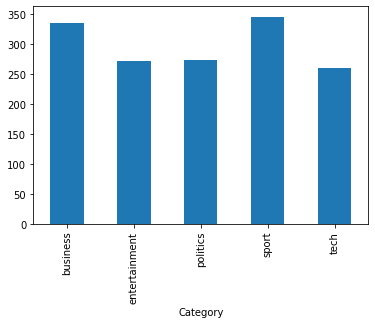

In [4]:
# Sample our data
Traindata.sample(10)

# Count and view our data
Traindata.groupby('Category').category_id.count()

# Bar plot for visualization 
Traindata.groupby('Category').category_id.count().plot.bar(ylim=0)

In [30]:
# Bring in our Tfid Vectorizer
    # Sublinear_tf set to True to give returns as freq. of word decreases
    # Min_df is minimum number of documents a word must be present in to be kept
    # norm is to ensure all our feature vectors have a euclidian norm of 1
    # encoding is used by our input text
    # ngram_range to indicate that we want to consider single words ('money', 'business') amd pairs of words ('stock market', 'comedy movies')
    # stop_words set to english for removing all common pronouns ('a', 'he', 'it')
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='12', encoding='latin-1', ngram_range=(1,2), stop_words='english')

features = tfidf.fit_transform(df.Text).toarray()
# turns our texts into features 


labels = Traindata.category_id

{'business': 0, 'tech': 1, 'politics': 2, 'sport': 3, 'entertainment': 4}

In [6]:
Traindata.Text

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in $168m payout eighteen former e...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object